In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder


In [20]:
df=pd.read_csv('Wholesale customers data.csv')
print(df.head(5))

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [21]:
# ktra missing value
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [22]:
# bỏ trùng
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [23]:
#mã hóa biến phân loại
df_encoded = df.copy()
cat_cols = ['Channel', 'Region']

encoder = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = encoder.fit_transform(df_encoded[col])

print("Dữ liệu sau khi mã hóa:")
print(df_encoded.head())

Dữ liệu sau khi mã hóa:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        1       2  12669  9656     7561     214              2674        1338
1        1       2   7057  9810     9568    1762              3293        1776
2        1       2   6353  8808     7684    2405              3516        7844
3        0       2  13265  1196     4221    6404               507        1788
4        1       2  22615  5410     7198    3915              1777        5185


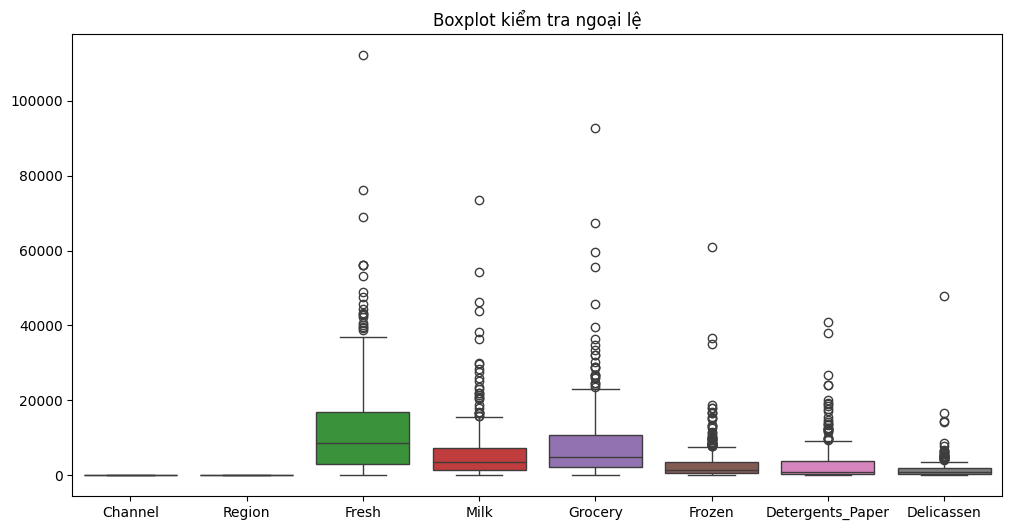

In [24]:
# outlier
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplot kiểm tra ngoại lệ")
plt.show()

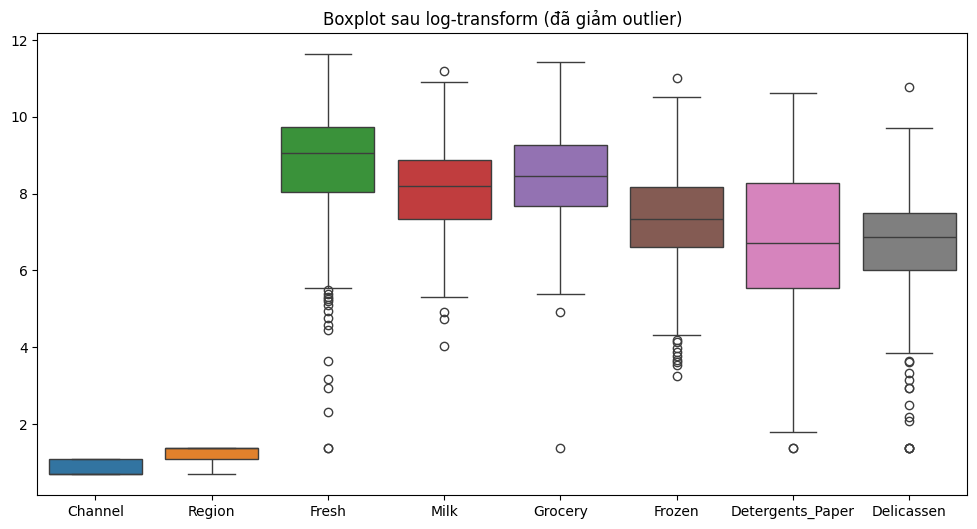

In [25]:
#log-transform
df_log = np.log1p(df)

plt.figure(figsize=(12,6))
sns.boxplot(data=df_log)
plt.title("Boxplot sau log-transform (đã giảm outlier)")
plt.show()

In [26]:
# chuẩn hóa z score
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_log)

df_scaled = pd.DataFrame(df_scaled, columns=df_log.columns)

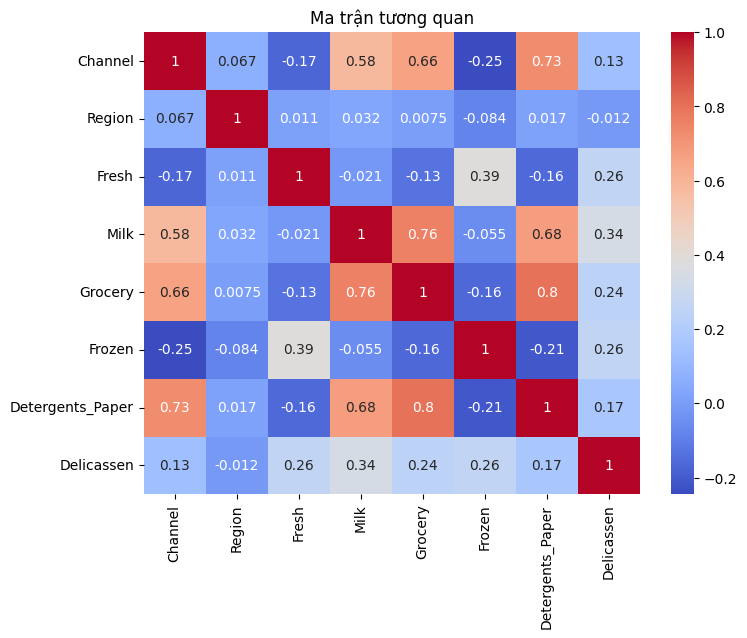

In [27]:
# ktra tương quan
plt.figure(figsize=(8,6))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.title("Ma trận tương quan")
plt.show()

In [34]:
n_features = df_scaled.shape[1]
pca = PCA(n_components=n_features, random_state=42)
X_pca = pca.fit_transform(df_scaled)

explained_ratio = pca.explained_variance_ratio_
cumulative = np.cumsum(explained_ratio)

explained_df = pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(explained_ratio))],
    "tỉ lệ githich": explained_ratio,
    "Cumulative": cumulative
})
explained_df.to_csv("pca_explained_variance.csv", index=False)
print("\nphương sai giải thích")
print(explained_df.head(5))


phương sai giải thích
    PC  tỉ lệ githich  Cumulative
0  PC1       0.407493    0.407493
1  PC2       0.205876    0.613369
2  PC3       0.126067    0.739436
3  PC4       0.081633    0.821069
4  PC5       0.074497    0.895566


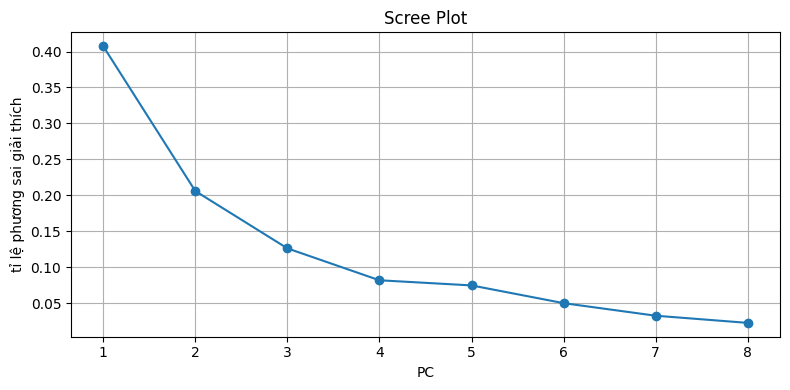

In [29]:
# Scree plot
plt.figure(figsize=(8,4))
plt.plot(range(1, n_features+1), explained_ratio, marker='o')
plt.xlabel("PC")
plt.ylabel("tỉ lệ phương sai giải thích")
plt.title("Scree Plot")
plt.grid(True)
plt.tight_layout()

plt.show()

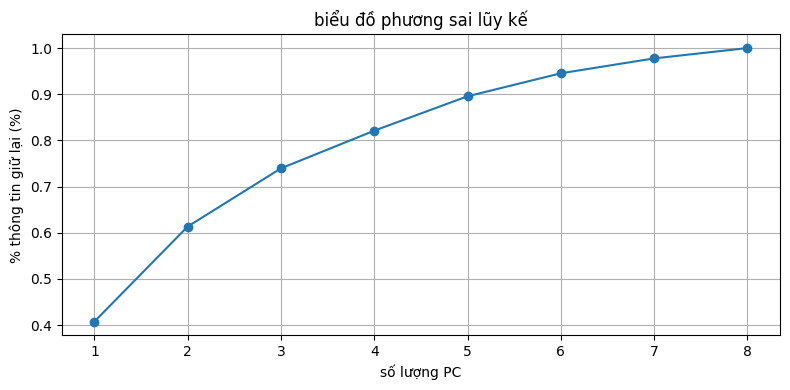

In [30]:
# biểu đồ phương sai lũy kế
plt.figure(figsize=(8,4))
plt.plot(range(1, n_features+1), cumulative, marker='o')
plt.xlabel("số lượng PC")
plt.ylabel("% thông tin giữ lại (%)")
plt.title("biểu đồ phương sai lũy kế")
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
so_pc = 5  # giữ lại 5 thành phần chính

pca_5 = PCA(n_components=so_pc, random_state=42)
X_pca_5 = pca_5.fit_transform(df_scaled)

ti_le_phuong_sai_5 = pca_5.explained_variance_ratio_
phuong_sai_luy_ke_5 = np.cumsum(ti_le_phuong_sai_5)
print("Tỉlệ phương sai giải thích của từng thành phần ")
for i, val in enumerate(ti_le_phuong_sai_5, start=1):
    print(f"  PC{i}: {val:.4f}")

print("\nPhương sai lũy kế sau 5 PC:", round(phuong_sai_luy_ke_5[-1], 4))

Tỉlệ phương sai giải thích của từng thành phần 
  PC1: 0.4075
  PC2: 0.2059
  PC3: 0.1261
  PC4: 0.0816
  PC5: 0.0745

Phương sai lũy kế sau 5 PC: 0.8956


In [32]:
#dataframe mới
df_pca_5 = pd.DataFrame(
    X_pca_5,
    columns=[f"PC{i}" for i in range(1, so_pc+1)]
)
print("\nDữ liệu sau khi giảm chiều (5 PC):")
display(df_pca_5.head())


Dữ liệu sau khi giảm chiều (5 PC):


,PC1,PC2,PC3,PC4,PC5
0,1.924304,-0.334688,0.768643,-0.180139,-1.319931
1,1.935661,0.512652,0.584256,-0.007583,0.132323
2,1.963340,1.211678,0.609309,0.863300,0.007587
3,-1.083845,1.134463,0.586847,0.235003,0.446259
4,1.318977,1.669774,0.729905,0.126589,-0.103686


In [33]:
#xuất file
output_path = "dataset_after_PCA_5PC.csv"
df_pca_5.to_csv(output_path, index=False)
print(f"Đã xuất dữ liệu sau PCA ra file: {output_path}")
print(f"Kích thước dữ liệu sau PCA: {df_pca_5.shape}")
display(df_pca_5.head())

Đã xuất dữ liệu sau PCA ra file: dataset_after_PCA_5PC.csv
Kích thước dữ liệu sau PCA: (440, 5)


,PC1,PC2,PC3,PC4,PC5
0,1.924304,-0.334688,0.768643,-0.180139,-1.319931
1,1.935661,0.512652,0.584256,-0.007583,0.132323
2,1.963340,1.211678,0.609309,0.863300,0.007587
3,-1.083845,1.134463,0.586847,0.235003,0.446259
4,1.318977,1.669774,0.729905,0.126589,-0.103686
